In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame

In [63]:
# Load data of closing transaction
df = pd.read_csv('../CSV/df_TS_all.csv')
df.head()

,timestamp,item_id,target
0,2020-01-01,FR13,0
1,2020-01-01,GB02,0
2,2020-01-01,IT01,1239
3,2020-01-01,PL01,0
4,2020-01-01,RO01,0


In [64]:
# Swap timestamp and item_id column
df = df[['item_id', 'timestamp', 'target']]
df.head()

,item_id,timestamp,target
0,FR13,2020-01-01,0
1,GB02,2020-01-01,0
2,IT01,2020-01-01,1239
3,PL01,2020-01-01,0
4,RO01,2020-01-01,0


In [65]:
# Dimension of the data
print(df.shape)

(6080, 3)


In [66]:
# Get first date and last date
print(df['timestamp'].min())
print(df['timestamp'].max())


2020-01-01
2023-04-30


In [67]:
# Create a new df of the item_id equal to IT01 
df_IT = df[df['item_id'] == 'IT01']

# Handling of outliers

In [68]:
# Mean, median, variance and standard deviation of the target variable for IT01
print("Mean: " + str(df_IT['target'].mean()))
print("Median: " + str(df_IT['target'].median()))
print("Variance: " + str(df_IT['target'].var()))
print("Standard Deviation: " + str(df_IT['target'].std()))


# Print max and min of the target variable for IT01
print("Max value: " + str(df_IT['target'].max()))
print("Min value: " + str(df_IT['target'].min()))


Mean: 323.1891447368421
Median: 135.5
Variance: 640033.5559643739
Standard Deviation: 800.0209722028378
Max value: 12113
Min value: 0


In [69]:
# Print all rows where the target variable is is larger than 3000
print(df_IT[df_IT['target'] > 2500])

     item_id   timestamp  target
12      IT01  2020-01-03    4221
1572    IT01  2020-11-10    7204
1917    IT01  2021-01-18    9651
2307    IT01  2021-04-06    2876
3347    IT01  2021-10-31   12113
3742    IT01  2022-01-18    9502
4207    IT01  2022-04-21    9765
4892    IT01  2022-09-05    2771
5607    IT01  2023-01-26   11020


In [70]:
# Replace the target variable with the mean where the target variable is larger than 3000
mean_target = df_IT['target'].mean()
df_IT.loc[df_IT['target'] > 2500, 'target'] = mean_target.astype(int)


In [71]:
# Mean, median, variance and standard deviation of the target variable for IT01
print("Mean: " + str(df_IT['target'].mean()))
print("Median: " + str(df_IT['target'].median()))
print("Variance: " + str(df_IT['target'].var()))
print("Standard Deviation: " + str(df_IT['target'].std()))


# Print max and min of the target variable for IT01
print("Max value: " + str(df_IT['target'].max()))
print("Min value: " + str(df_IT['target'].min()))

Mean: 268.73519736842104
Median: 135.5
Variance: 152395.1610975744
Standard Deviation: 390.3782282576404
Max value: 2486
Min value: 0


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


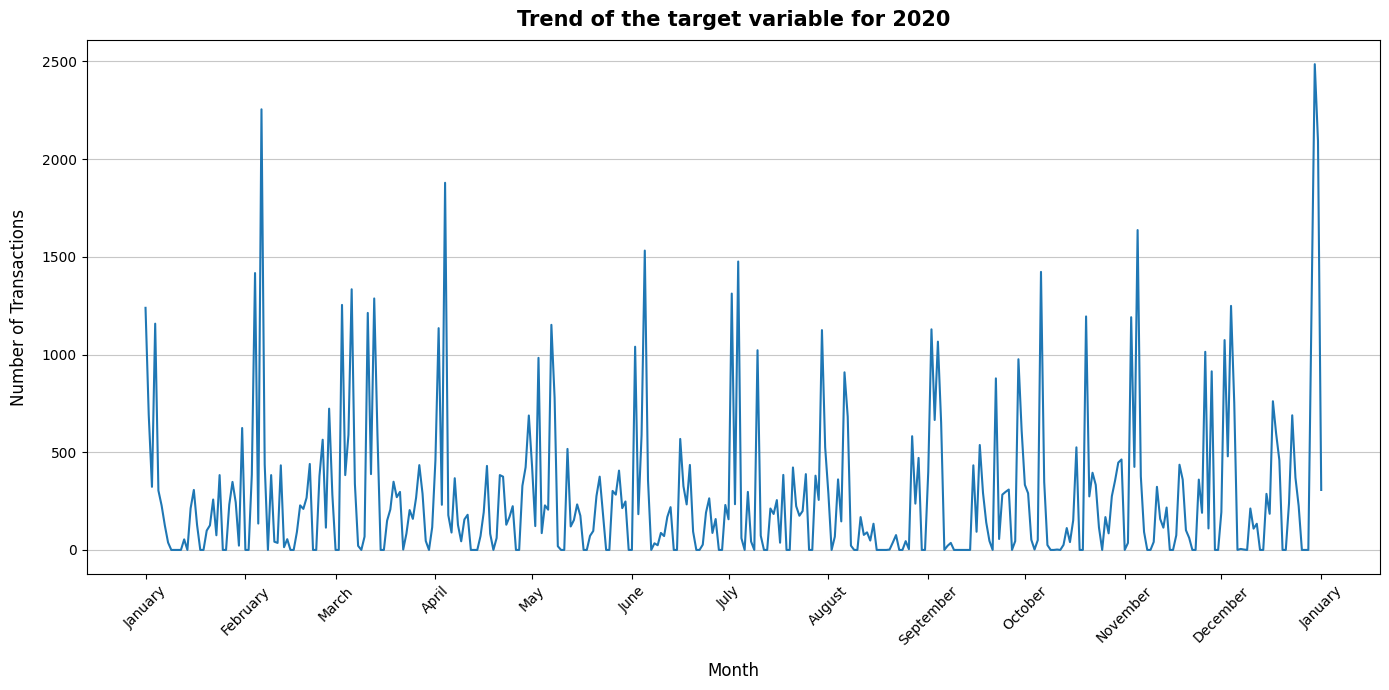

In [72]:
from matplotlib.dates import MonthLocator, DateFormatter

# Show the trend of the target variable for the 2020 year
plt.figure(figsize=(14, 7))
plt.plot(df_IT[(df_IT['timestamp'] >= '2020-01-01') & (df_IT['timestamp'] < '2021-01-01')]['timestamp'],
         df_IT[(df_IT['timestamp'] >= '2020-01-01') & (df_IT['timestamp'] < '2021-01-01')]['target'])

plt.title('Trend of the target variable for 2020', fontsize=15, fontweight='bold', pad=10)
plt.xlabel('Month', fontsize=12, labelpad=10)
plt.ylabel('Number of Transactions', fontsize=12, labelpad=10)

# Format x-axis ticks to display only month names
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%B'))

plt.xticks(fontsize=10, rotation=45) 
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()



INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


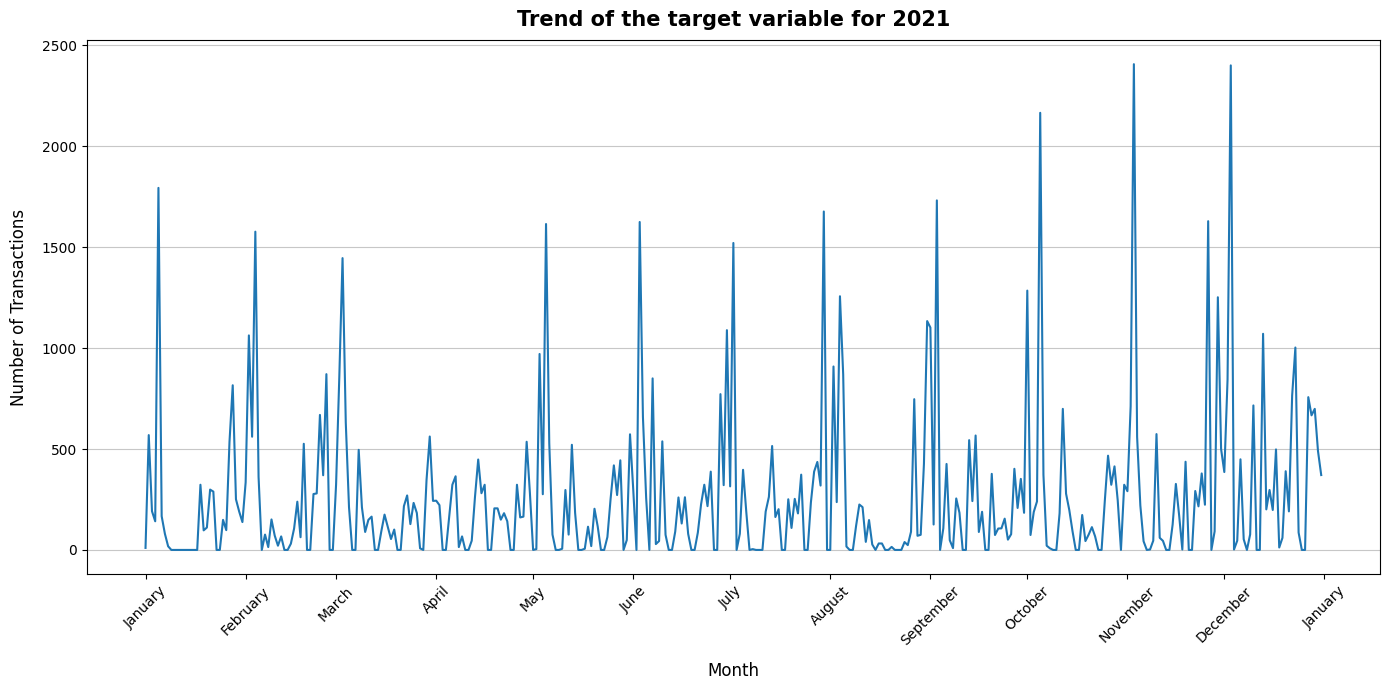

In [73]:
# Show the trend of the target variable for the 2021 year
plt.figure(figsize=(14, 7))
plt.plot(df_IT[(df_IT['timestamp'] >= '2021-01-01') & (df_IT['timestamp'] < '2022-01-01')]['timestamp'],
         df_IT[(df_IT['timestamp'] >= '2021-01-01') & (df_IT['timestamp'] < '2022-01-01')]['target'])

plt.title('Trend of the target variable for 2021', fontsize=15, fontweight='bold', pad=10)
plt.xlabel('Month', fontsize=12, labelpad=10)
plt.ylabel('Number of Transactions', fontsize=12, labelpad=10)

# Format x-axis ticks to display only month names
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%B'))

plt.xticks(fontsize=10, rotation=45)  
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


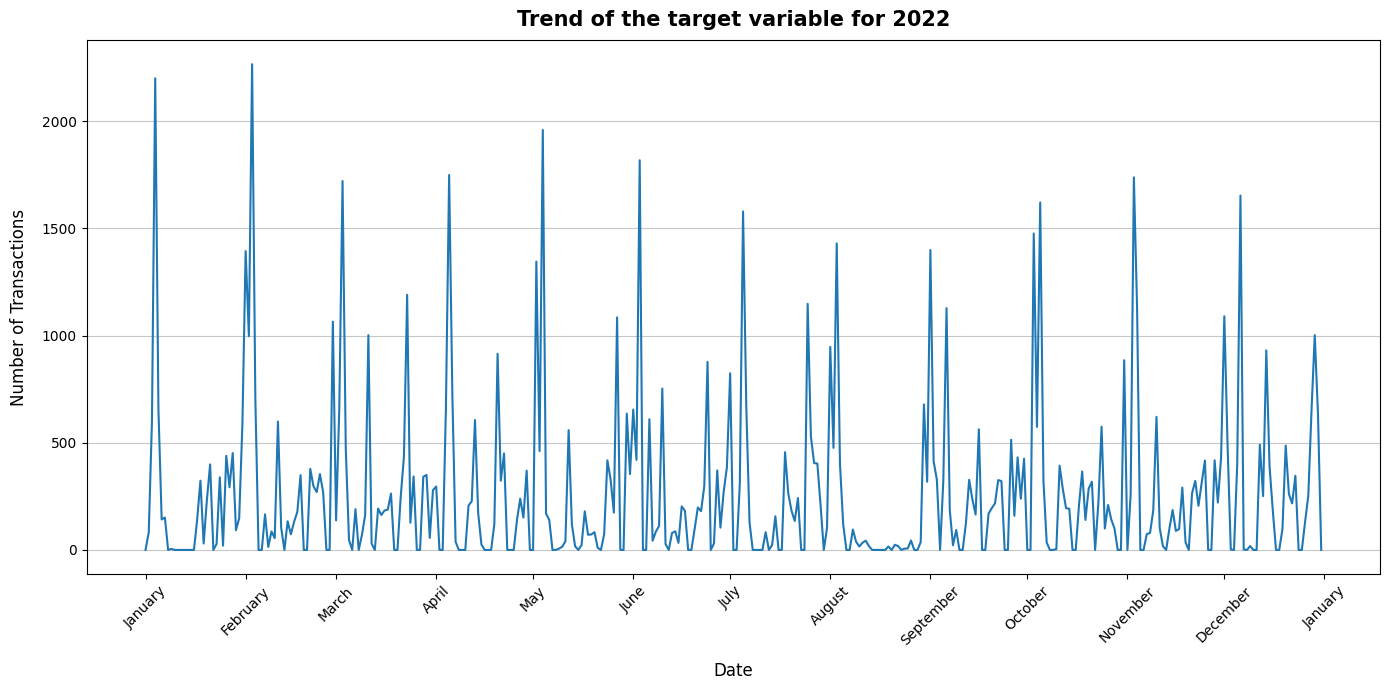

In [74]:
# Show the trend of the target variable for the 2022 year
plt.figure(figsize=(14, 7))
plt.plot(df_IT[(df_IT['timestamp'] >= '2022-01-01') & (df_IT['timestamp'] < '2023-01-01')]['timestamp'],
         df_IT[(df_IT['timestamp'] >= '2022-01-01') & (df_IT['timestamp'] < '2023-01-01')]['target'])

plt.title('Trend of the target variable for 2022', fontsize=15, fontweight='bold', pad=10)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Number of Transactions', fontsize=12, labelpad=10)

# Format x-axis ticks to display only month names
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%B'))

plt.xticks(fontsize=10, rotation=45) 
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


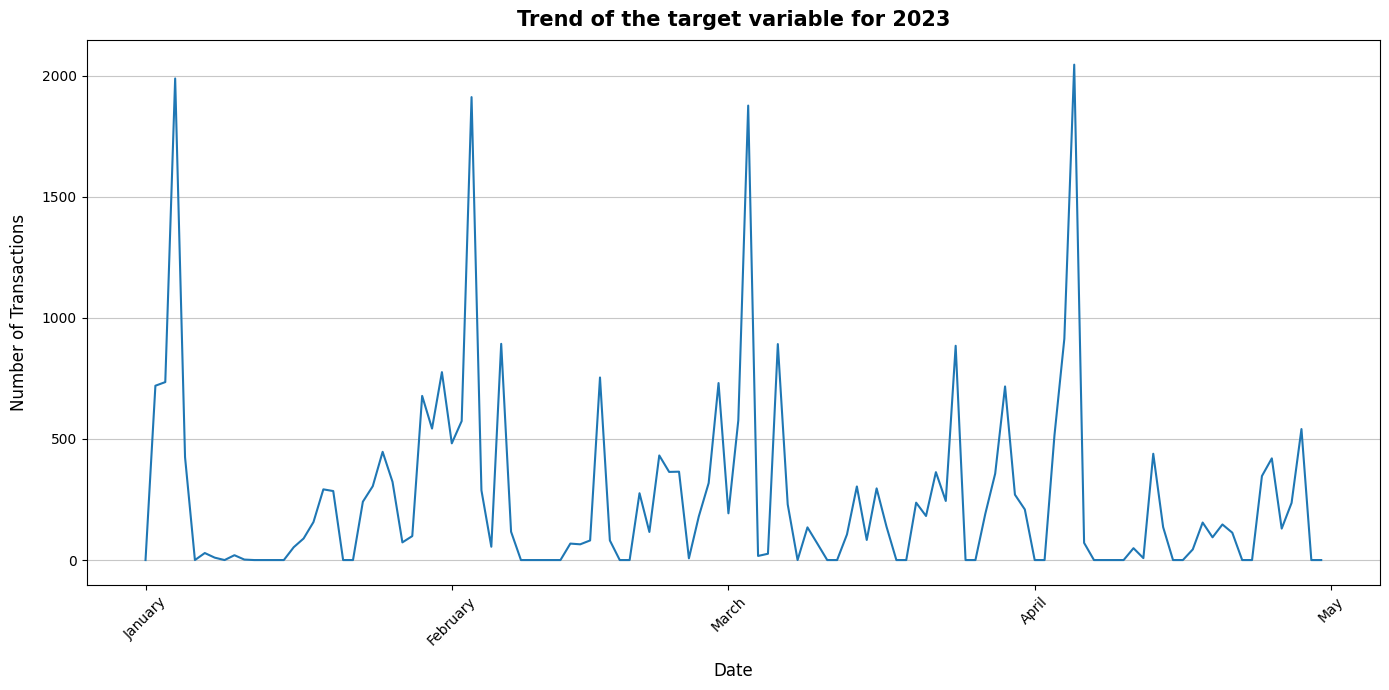

In [75]:
# Show the trend of the target variable for the 2023 year
plt.figure(figsize=(14, 7))
plt.plot(df_IT[(df_IT['timestamp'] >= '2023-01-01') & (df_IT['timestamp'] < '2024-01-01')]['timestamp'],
         df_IT[(df_IT['timestamp'] >= '2023-01-01') & (df_IT['timestamp'] < '2024-01-01')]['target'])

plt.title('Trend of the target variable for 2023', fontsize=15, fontweight='bold', pad=10)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Number of Transactions', fontsize=12, labelpad=10)

# Format x-axis ticks to display only month names
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%B'))

plt.xticks(fontsize=10, rotation=45)  
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


In [76]:
# Split data into training and testing set; train set based on timestamp from 2020-01-01 to 2022-04-30 and test set based on timestamp from 2022-05-01 to 2023-04-30
train_data = df_IT[df_IT['timestamp'] <= '2022-04-30']
test_data = df_IT[df_IT['timestamp'] > '2022-04-30']

# Calculate the percentage of the training set and testing set
print(train_data.shape[0] / df_IT.shape[0])
print(test_data.shape[0] / df_IT.shape[0])

0.6998355263157895
0.3001644736842105


In [77]:
# Convert train_data to TimeSeriesDataFrame
train_data = TimeSeriesDataFrame(
    train_data, 
    id_column="item_id",
    timestamp_column="timestamp"
    
)

train_data.head()

target
item_id timestamp         
IT01    2020-01-01    1239
        2020-01-02     691
        2020-01-03     323
        2020-01-04    1158
        2020-01-05     304

In [78]:
# Convert test_data to TimeSeriesDataFrame (take only row with item_id = 'IT01')
test_data = TimeSeriesDataFrame(
    test_data, 
    id_column="item_id",
    timestamp_column="timestamp"
    
)

test_data.head()

target
item_id timestamp         
IT01    2022-05-01       0
        2022-05-02    1345
        2022-05-03     461
        2022-05-04    1959
        2022-05-05     169

In [79]:
# Add weekend column to the train_data to indicate if the day is a weekend or not (1 for weekend, 0 for weekday)
timestamps= train_data.index.get_level_values('timestamp')
WEEKEND_INDICES = [5, 6]

train_data['weekend'] = timestamps.weekday.isin(WEEKEND_INDICES).astype(int)

train_data.head()


target  weekend
item_id timestamp                  
IT01    2020-01-01    1239        0
        2020-01-02     691        0
        2020-01-03     323        0
        2020-01-04    1158        1
        2020-01-05     304        1

In [80]:
# Add weekend column to the test_data to indicate if the day is a weekend or not (1 for weekend, 0 for weekday)
timestamps= test_data.index.get_level_values('timestamp')
WEEKEND_INDICES = [5, 6]

test_data['weekend'] = timestamps.weekday.isin(WEEKEND_INDICES).astype(int)

test_data.head()

target  weekend
item_id timestamp                  
IT01    2022-05-01       0        1
        2022-05-02    1345        0
        2022-05-03     461        0
        2022-05-04    1959        0
        2022-05-05     169        0

In [81]:
# Print first 10 row where item_id is IT01
train_data.loc['IT01'].head(7)


,target,weekend
timestamp,,
2020-01-01,1239,0
2020-01-02,691,0
2020-01-03,323,0
2020-01-04,1158,1
2020-01-05,304,1
2020-01-06,227,0
2020-01-07,125,0


In [82]:
# Build predictor
predictor = TimeSeriesPredictor(
    prediction_length=30,
    freq='D',
    target='target',
    known_covariates_names=['weekend'],
    path='test_prediction',
    eval_metric='MASE'
)

In [83]:
# Fit the model
predictor.fit(
    train_data,
    presets='best_quality',
    time_limit=2400
)

Beginning AutoGluon training... Time limit = 2400s
AutoGluon will save models to 'test_prediction'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.9.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
GPU Count:          0
Memory Avail:       7.92 GB / 15.78 GB (50.2%)
Disk Space Avail:   107.52 GB / 475.83 GB (22.6%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'freq': 'D',
 'hyperparameters': 'default',
 'known_covariates_names': ['weekend'],
 'num_val_windows': 2,
 'prediction_length': 30,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'target': 'target',
 'time_limit': 2400,
 'verbosity': 2}

Provided train_data has 851 rows, 1 time series. Median time series length is 851 (min=851, max=851). 

Provided dataset contains fo

In [84]:
from autogluon.timeseries.utils.forecast import get_forecast_horizon_index_ts_dataframe

future_index = get_forecast_horizon_index_ts_dataframe(train_data, prediction_length=30)
future_timestamps = future_index.get_level_values("timestamp")
known_covariates = pd.DataFrame(index=future_index)
known_covariates["weekend"] = future_timestamps.weekday.isin(WEEKEND_INDICES).astype(float)

known_covariates.head()

weekend
item_id timestamp          
IT01    2022-05-01      1.0
        2022-05-02      0.0
        2022-05-03      0.0
        2022-05-04      0.0
        2022-05-05      0.0

In [99]:
# Make prediction on training data
predictions = predictor.predict(train_data, known_covariates=known_covariates)
predictions.head()

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean         0.1         0.2          0.3  \
item_id timestamp                                                      
IT01    2022-05-01    28.175634   -3.278764  -25.156712    -8.389111   
        2022-05-02   334.301337  147.469116  182.832082   258.792189   
        2022-05-03   357.015995  124.766605  178.974319   251.592000   
        2022-05-04  1445.676789  735.860961  877.160356  1014.210244   
        2022-05-05   839.612111  477.723742  581.875765   669.901891   

                            0.4          0.5          0.6          0.7  \
item_id timestamp                                                        
IT01    2022-05-01    35.817501    28.175634    64.359210    86.012798   
        2022-05-02   318.876724   334.301337   520.819396   652.259140   
        2022-05-03   307.835932   357.015995   523.201766   684.851230   
        2022-05-04  1258.464608  1445.676789  1463.001396  1825.373924   
        2022-05-05   743.595215   839.612111   859.688456   978.716557   

                            0.8          0.9  
item_id timestamp                             
IT01    2022-05-01   143.212012   136.211602  
        2022-05-02   981.208597  1263.580535  
        2022-05-03  1028.111581  1281.779500  
        2022-05-04  1903.711226  2035.383912  
        2022-05-05  1012.582344  1229.839012

In [86]:
predictor.leaderboard(test_data)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,DeepAR,-0.461274,-0.641091,0.203526,0.196468,183.242251,9
1,TemporalFusionTransformer,-0.506888,-0.480813,0.062498,0.031247,568.602694,10
2,WeightedEnsemble,-0.508043,-0.480220,1.036860,0.912641,2.797040,12
3,DirectTabular,-0.541798,-0.631119,0.078080,0.113542,2.242361,8
4,RecursiveTabular,-0.601874,-0.713868,0.896282,0.767852,12.716571,7
5,NPTS,-0.623997,-0.630003,2.486645,0.169501,0.211288,3
6,PatchTST,-0.625976,-0.636643,0.062510,0.016733,87.871015,11
7,DynamicOptimizedTheta,-0.720380,-0.709940,15.077410,26.688001,29.407511,5
8,SeasonalNaive,-0.738621,-0.886684,3.003434,2.100655,2.816370,1
9,AutoETS,-0.745933,-0.702748,24.204903,19.828786,19.479977,4


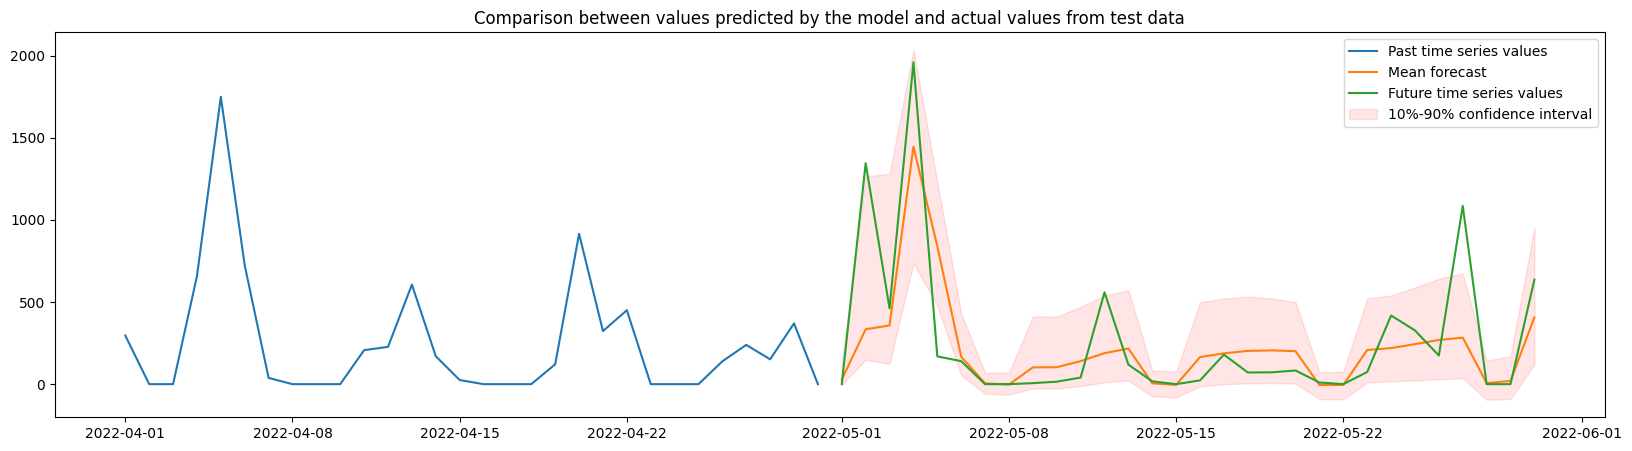

In [96]:
plt.figure(figsize=(20, 5))
plt.title("Comparison between values predicted by the model and actual values from test data")

item_id = "IT01"
y_past = train_data.loc[item_id]["target"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["target"][:30]

plt.plot(y_past[-30:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend()


In [88]:
# Print all row of predictions where item_id is IT01
predictions.loc['IT01']

,mean,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
timestamp,,,,,,,,,,
2022-05-01,28.175634,-3.278764,-25.156712,-8.389111,35.817501,28.175634,64.359210,86.012798,143.212012,136.211602
2022-05-02,334.301337,147.469116,182.832082,258.792189,318.876724,334.301337,520.819396,652.259140,981.208597,1263.580535
2022-05-03,357.015995,124.766605,178.974319,251.592000,307.835932,357.015995,523.201766,684.851230,1028.111581,1281.779500
2022-05-04,1445.676789,735.860961,877.160356,1014.210244,1258.464608,1445.676789,1463.001396,1825.373924,1903.711226,2035.383912
2022-05-05,839.612111,477.723742,581.875765,669.901891,743.595215,839.612111,859.688456,978.716557,1012.582344,1229.839012
2022-05-06,166.782072,53.091808,90.249517,126.652694,131.437250,166.782072,197.261156,189.601727,256.636922,430.092086
2022-05-07,4.363333,-58.192092,-33.384109,-21.455174,-12.368488,4.363333,7.216097,20.042420,41.360797,68.846565
2022-05-08,-2.155618,-64.993334,-39.974961,-28.954575,-16.861504,-2.155618,6.187300,22.461336,42.831877,70.317332
2022-05-09,102.081717,-25.834558,17.360654,35.740413,74.095836,102.081717,137.299295,154.356959,234.964001,412.367287


In [89]:
# Sum all value of mean forecast of predictions where item_id is IT01
predictions.loc['IT01']['mean'].sum()

6531.920866246939

In [90]:
# Sum all value of target of test_data where item_id is IT01 and timestamp is from 2022-05-01 to 2022-05-30
test_data.loc['IT01']['target'][:30].sum()


7983

In [91]:
# Calculate difference betweend each prediction and actual value of test_data
diff = predictions.loc['IT01']['mean'] - test_data.loc['IT01']['target'][:30]
diff


timestamp
2022-05-01      28.175634
2022-05-02   -1010.698663
2022-05-03    -103.984005
2022-05-04    -513.323211
2022-05-05     670.612111
2022-05-06      26.782072
2022-05-07       4.363333
2022-05-08      -2.155618
2022-05-09      96.081717
2022-05-10      87.987996
2022-05-11     100.144393
2022-05-12    -370.238166
2022-05-13      97.848194
2022-05-14     -12.078876
2022-05-15      -4.487365
2022-05-16     141.668234
2022-05-17       7.811536
2022-05-18     131.327058
2022-05-19     133.468741
2022-05-20     117.548722
2022-05-21     -15.109408
2022-05-22      -4.929001
2022-05-23     134.096324
2022-05-24    -198.483425
2022-05-25     -83.555513
2022-05-26      95.078253
2022-05-27    -801.727350
2022-05-28       6.686685
2022-05-29      19.559784
2022-05-30    -229.549321
dtype: float64